In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
data_dir = 'test'
categories = ['cats', 'dogs']
img_size = 64

data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_array = cv2.resize(img_array, (img_size, img_size))
            data.append(resized_array.flatten())
            labels.append(class_num)
        except Exception as e:
            pass

data = np.array(data)
labels = np.array(labels)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [4]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

Accuracy: 51.90%


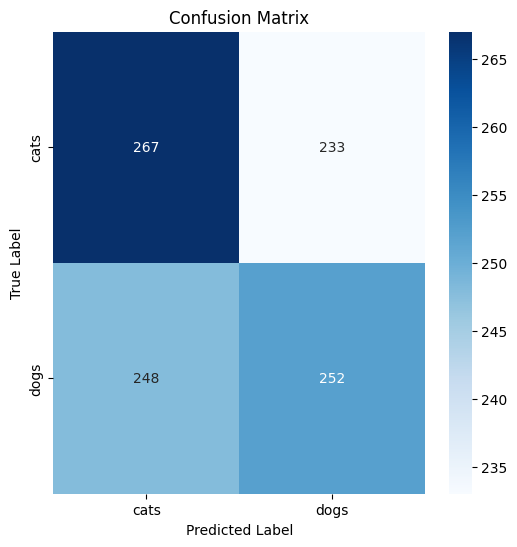

              precision    recall  f1-score   support

        cats       0.52      0.53      0.53       500
        dogs       0.52      0.50      0.51       500

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification
print(classification_report(y_test, y_pred, target_names=categories))

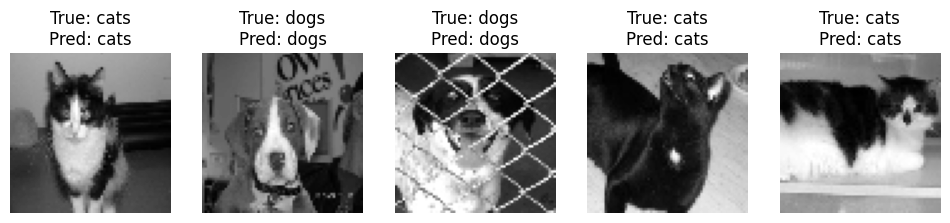

In [6]:
def display_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        img = images[i].reshape(img_size, img_size)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {categories[labels[i]]}\nPred: {categories[predictions[i]]}")
        plt.axis('off')
    plt.show()
display_images(X_test[:5], y_test[:5], y_pred[:5])